In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
#This will download the dataset if you do not have it locally.
#My dataset is from kaggle, and you'll need a Kaggle account to download.
od.download('https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_stocks.csv')

Skipping, found downloaded files in ".\sp-500-stocks" (use force=True to force download)


In [4]:
#Reading data in
stocks_data = pd.read_csv('sp-500-stocks/sp500_stocks.csv')
stocks_info = pd.read_csv('sp-500-stocks/sp500_companies.csv')

In [5]:
print(stocks_data)
print(stocks_info)

               Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
1        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
2        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
3        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
4        2010-01-08    MMM   60.247749   84.320000   84.320000   83.300003   
...             ...    ...         ...         ...         ...         ...   
1644805  2022-12-21    ZTS  144.919998  144.919998  146.149994  142.779999   
1644806  2022-12-22    ZTS  145.029999  145.029999  145.100006  141.850006   
1644807  2022-12-23    ZTS  145.759995  145.759995  145.889999  143.539993   
1644808  2022-12-27    ZTS  145.300003  145.300003  146.149994  143.570007   
1644809  2022-12-28    ZTS  143.830002  143.830002  146.610001  143.779999   

               Open     Volume  
0         83.089996  3043700.0

This dataset is two .csv files with different information, but I want all of the information in one dataframe, so I'll merge them right away.

In [6]:
#Merging tables
data = stocks_data.merge(stocks_info, how='left', on='Symbol')

In [7]:
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941


In [8]:
print(data.columns)
print(data['Exchange'].unique())
print(data['Sector'].unique())
print(data['Industry'].unique())
print(data['Symbol'].unique())

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')
['NYQ' 'NMS' 'BTS' nan 'NGM']
['Industrials' 'Healthcare' 'Technology' 'Communication Services'
 'Consumer Defensive' 'Consumer Cyclical' 'Utilities' 'Financial Services'
 'Basic Materials' 'Real Estate' 'Energy' nan]
['Conglomerates' 'Specialty Industrial Machinery' 'Medical Devices'
 'Drug Manufacturers—General' 'Information Technology Services'
 'Electronic Gaming & Multimedia' 'Farm Products'
 'Software—Infrastructure' 'Staffing & Employment Services'
 'Specialty Retail' 'Utilities—Diversified' 'Insurance—Life'
 'Diagnostics & Research' 'Specialty Chemicals' 'Airlines' 'REIT—Office'
 'Security & Protection Services' 'Utilities—Regulated Electric'
 'Insurance—Property

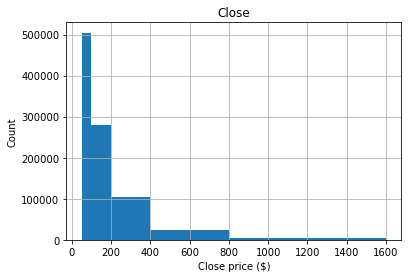

<Figure size 432x288 with 0 Axes>

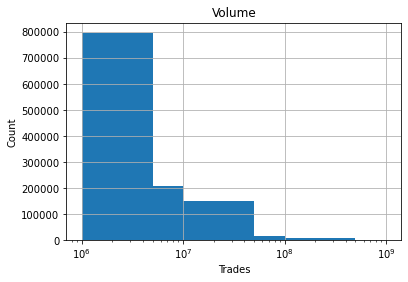

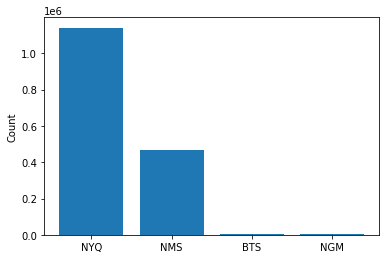

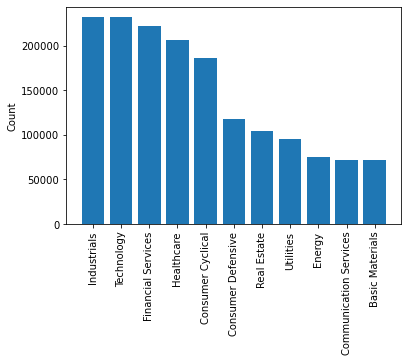

<Figure size 432x288 with 0 Axes>

In [36]:
#Plotting some distributions
data.hist('Close', bins=[50, 100, 200, 400, 800, 1600])
plt.ylabel('Count')
plt.xlabel('Close price ($)')
plt.show()
plt.clf()

data.hist('Volume', bins=[1e6, 5e6, 1e7, 5e7, 1e8, 5e8, 1e9])
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Trades')
plt.show()
plt.clf()

plt.bar(data['Exchange'].value_counts().index, data['Exchange'].value_counts().values)
plt.ylabel('Count')
plt.show()
plt.clf()

plt.bar(data['Sector'].value_counts().index, data['Sector'].value_counts().values)
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()
plt.clf()

In [37]:
#Some exchange values are NaN, let's investigate which companies
#do not have an exchange or have incomplete data.
data.loc[data['Exchange'].isna()]['Symbol'].unique()

array(['CEG', 'ELV', 'GEN', 'META', 'PARA', 'SBUX', 'V', 'WBD', 'WTW'],
      dtype=object)

In [38]:
#Looking at a specific case
print(data.loc[data['Symbol'] == 'META'].tail())
print(data.loc[data['Symbol'] == 'META'].head())

               Date Symbol   Adj Close       Close        High         Low  \
1016965  2022-12-21   META  119.760002  119.760002  120.339996  115.620003   
1016966  2022-12-22   META  117.120003  117.120003  118.620003  114.379997   
1016967  2022-12-23   META  118.040001  118.040001  118.180000  115.540001   
1016968  2022-12-27   META  116.879997  116.879997  118.599998  116.050003   
1016969  2022-12-28   META  115.620003  115.620003  118.129997  115.519997   

               Open      Volume Exchange Shortname  ... Currentprice  \
1016965  116.699997  20392800.0      NaN       NaN  ...          NaN   
1016966  117.199997  23618100.0      NaN       NaN  ...          NaN   
1016967  116.029999  17782900.0      NaN       NaN  ...          NaN   
1016968  117.930000  21392300.0      NaN       NaN  ...          NaN   
1016969  116.250000  19280132.0      NaN       NaN  ...          NaN   

        Marketcap Ebitda  Revenuegrowth  City  State  Country  \
1016965       NaN    NaN         

Either from the way the data was loaded in, or the way the dataset was constructed, the dataframe holds NaNs for dates that were before a stock existed. I'm not sure what to do with this yet, because each symbol having the same number of data points proves useful later (when making the moving average).

In [39]:
#Making a new column for companies with relatively small, medium or large marketcaps.
data['cap_grouping'] = pd.qcut(data['Marketcap'], q=3, labels=['small', 'medium', 'large'])

In [40]:
#Making a ten day moving average column using .rolling method
#3270 is the number of data points for each company
tenday_avg = []
for i in range(int(len(data)/3270)):
    rolling = data['Close'].iloc[i*3270:(i+1)*3270].rolling(10)
    tenday_avg.extend(list(rolling.mean()))

In [49]:
#Add this list as a column in the dataframe
data['tenday_avg'] = tenday_avg

In [52]:
#Save to file
data.to_csv('data/wrangled_data.csv')